In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pickle

In [3]:
def confidence_ellipse(val, cov, ax, n_std=1.0, facecolor='none', **kwargs):
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = val[0]

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = val[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

[ 0.00461552 -2.2072653 ] [[1.20484223e-10 2.58248681e-08]
 [2.58248681e-08 6.75377881e-05]]
[ 0.0048634  -2.16428586] [[2.02044195e-10 3.71683187e-08]
 [3.71683187e-08 1.02931809e-04]]
[ 0.00481711 -2.14838868] [[1.27520041e-10 2.09052181e-08]
 [2.09052181e-08 6.39235069e-05]]
[ 0.00468884 -2.14003083] [[6.73109907e-10 1.12368622e-07]
 [1.12368622e-07 3.80662556e-04]]
[ 0.00477073 -2.086128  ] [[2.73873151e-10 3.76591868e-08]
 [3.76591868e-08 9.70340497e-05]]
[ 0.00446477 -2.09483014] [[2.96839499e-10 4.85460744e-08]
 [4.85460744e-08 1.22352358e-04]]
[ 0.00499287 -2.02159428] [[2.96854362e-10 3.22024315e-08]
 [3.22024315e-08 1.01429766e-04]]
[ 0.0044768  -1.99551408] [[1.47842319e-09 1.23991360e-07]
 [1.23991360e-07 6.33165511e-04]]


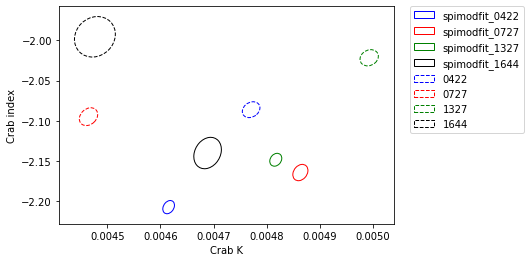

In [8]:
folders = [
    "spimodfit/0422_crab_only",
    "spimodfit/0727_crab_only",
    "spimodfit/1327_crab_only",
    "spimodfit/1644_crab_only",
    "orbit_0422",
    "orbit_0727",
    "orbit_1327",
    "orbit_1644"
]
names = [
    "spimodfit_0422",
    "spimodfit_0727",
    "spimodfit_1327",
    "spimodfit_1644",
    "0422",
    "0727",
    "1327",
    "1644"
]
edgecolors = [
    "blue",
    "red",
    "green",
    "black",
    "blue",
    "red",
    "green",
    "black",
]
linestyles = [
    "solid",
    "solid",
    "solid",
    "solid",
    "dashed",
    "dashed",
    "dashed",
    "dashed",
]

fig, ax = plt.subplots()
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    print (val, cov)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
ax.autoscale()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Crab K")
plt.ylabel("Crab index")
plt.savefig("spimodfit_comparison.pdf")